<a href="https://colab.research.google.com/github/ovisual/cu_prj/blob/main/new_NPP_TIme_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NPP FORECASTING USING PYTHON

IMPORT MAIN DEPENDENCIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# !pip install -q auto-ts pystan~=2.14 fbprophet
# !python -m pip install prophet
!pip install auto-ts

  Using cached auto_ts-0.0.82-py3-none-any.whl (109 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Using cached qtconsole-5.5.1-py3-none-any.whl (123 kB)
  Using cached QtPy-2.4.1-py3-none-any.whl (93 kB)


In [20]:
import prophet
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.82. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [5]:
df=pd.read_csv("./drive/MyDrive/npp_data.csv")

In [ ]:
df

,year,DATE,month,rdate,NPP,NDVI
0,1993,nov-1993,nov,1993-11-01,26.08,0.639
1,1993,dec-1993,dec,1993-12-01,23.84,0.535
2,1993,jan-1993,jan,1993-01-01,22.95,0.529
3,1993,feb-1993,feb,1993-02-01,22.30,0.425
4,1993,mar-1993,mar,1993-03-01,25.22,0.528
...,...,...,...,...,...,...
79,2022,jun-2022,jun,2022-06-01,29.89,0.427
80,2022,jul-2022,jul,2022-07-01,32.70,0.466
81,2022,aug-2022,aug,2022-08-01,39.43,0.515
82,2022,sep-2022,sep,2022-09-01,42.56,0.571


In [8]:
date_column="rdate"
prediction_col= "NPP"
df['rdate']=pd.to_datetime(df['rdate'],format='%d/%m/%Y')

In [6]:
df['year'].unique()

array([1993, 1998, 2003, 2008, 2013, 2018, 2022])

In [9]:
df['rdate'].max()-df['rdate'].min() # time period diration

Timedelta('10926 days 00:00:00')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    84 non-null     int64         
 1   DATE    84 non-null     object        
 2   month   84 non-null     object        
 3   rdate   84 non-null     datetime64[ns]
 4   NPP     84 non-null     float64       
 5   NDVI    84 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.1+ KB


In [17]:
train_df=df.iloc[:-24]
test_df=df.iloc[-24:]

In [18]:
train_df.drop(['month','DATE','NDVI','year'],axis=1, inplace=True)
test_df.drop(['month','DATE','NDVI','year'],axis=1, inplace=True)

<ipython-input-18-ce55a4478dd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['month','DATE','NDVI','year'],axis=1, inplace=True)
<ipython-input-18-ce55a4478dd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['month','DATE','NDVI','year'],axis=1, inplace=True)


In [12]:
train_df

,rdate,NPP
0,1993-11-01,26.08
1,1993-12-01,23.84
2,1993-01-01,22.95
3,1993-02-01,22.30
4,1993-03-01,25.22
5,1993-04-01,25.85
6,1993-05-01,31.40
7,1993-06-01,34.17
8,1993-07-01,38.17
9,1993-08-01,41.82


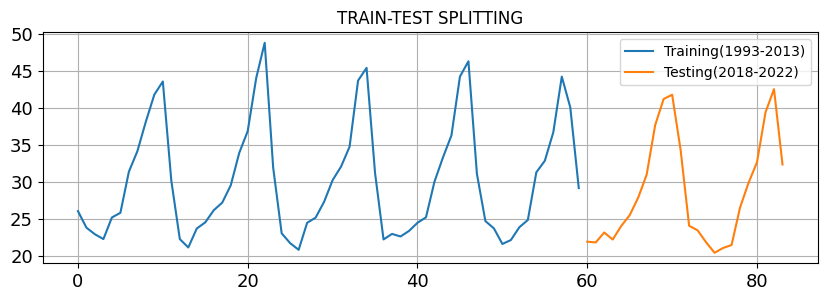

In [16]:
train_df[prediction_col].plot(figsize=(10,3),fontsize=13, label='Training(1993-2013)')
test_df[prediction_col].plot(figsize=(10,3),fontsize=13, label='Testing(2018-2022)')
plt.legend()
plt.title("TRAIN-TEST SPLITTING")
plt.grid()
plt.show()

<Axes: title={'center': 'NPP'}, xlabel='rdate'>

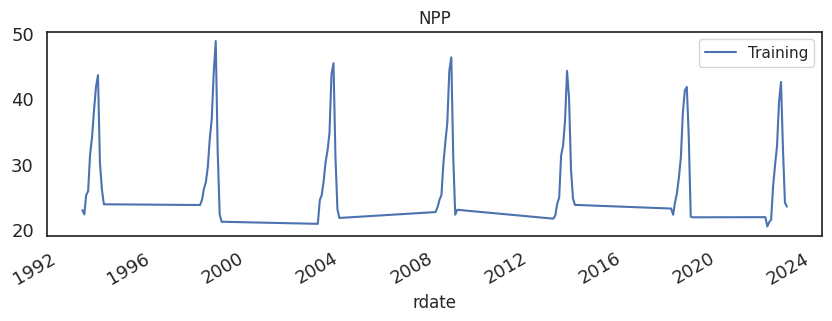

In [21]:
model=auto_timeseries(forecast_period=24, score_type='rmse', time_interval='M', model_type='best')

Start of Fit.....
    Target variable given as = NPP
Start of loading of data.....
    Inputs: ts_column = rdate, sep = ,, target = ['NPP']
    Using given input: pandas dataframe...
    rdate column exists in given train data...
    train data shape = (60, 1)
Alert: Could not detect strf_time_format of rdate. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/myn06_yu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/asghryvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76444', 'data', 'file=/tmp/tmpq86uwd5m/myn06_yu.json', 'init=/tmp/tmpq86uwd5m/asghryvo.json', 'output', 'file=/tmp/tmpq86uwd5m/prophet_modeldwndofbn/prophet_model-20240116080621.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
08:06:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Lowering forecast period to 10 to enable cross_validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 10 Test Shape: 10
    RMSE = 9.49
    Std Deviation of actuals = 6.31
    Normalized RMSE (as pct of std dev) = 150%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 20 Test Shape: 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/wjcdn6_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/xmcisdew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27142', 'data', 'file=/tmp/tmpq86uwd5m/wjcdn6_2.json', 'init=/tmp/tmpq86uwd5m/xmcisdew.json', 'output', 'file=/tmp/tmpq86uwd5m/prophet_model0jiyemwi/prophet_model-20240116080621.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
08:06:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/uzsft58e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/vm3uzzqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

    RMSE = 40.06
    Std Deviation of actuals = 9.28
    Normalized RMSE (as pct of std dev) = 432%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 30 Test Shape: 10


08:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/n82jxtg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/90b6lutc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24223', 'data', 'file=/tmp/tmpq86uwd5m/n82jxtg8.json', 'init=/tmp/tmpq86uwd5m/90b6lutc.json', 'output', 'file=/tmp/tmpq86uwd5m/prophet_modeleud9p8qb/prophet_model-20240116080622.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
08:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 15.63
    Std Deviation of actuals = 8.09
    Normalized RMSE (as pct of std dev) = 193%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 40 Test Shape: 10


08:06:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/l19f71a1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/iezo90kk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32177', 'data', 'file=/tmp/tmpq86uwd5m/l19f71a1.json', 'init=/tmp/tmpq86uwd5m/iezo90kk.json', 'output', 'file=/tmp/tmpq86uwd5m/prophet_modelkfutdfx2/prophet_model-20240116080622.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
08:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 11.68
    Std Deviation of actuals = 7.76
    Normalized RMSE (as pct of std dev) = 150%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 50 Test Shape: 10


08:06:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 3.57
    Std Deviation of actuals = 7.42
    Normalized RMSE (as pct of std dev) = 48%
Cross Validation window: 5 completed


DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/rr_5ihrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq86uwd5m/0aug_m1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78583', 'data', 'file=/tmp/tmpq86uwd5m/rr_5ihrz.json', 'init=/tmp/tmpq86uwd5m/0aug_m1p.json', 'output', 'file=/tmp/tmpq86uwd5m/prophet_modelq8h0jynp/prophet_model-20240116080622.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
08:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 11.09
    MSE (Mean Squared Error = 417.63
    MAPE (Mean Absolute Percent Error) = 40%
    RMSE (Root Mean Squared Error) = 20.4360
    Normalized RMSE (MinMax) = 73%
    Normalized RMSE (as Std Dev of Actuals)= 255%
Time Taken = 2 seconds


08:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Lowering forecast period to 10 to enable cross_validation
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=98.332, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=59.726, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=58.522, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=57.457, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=56.711, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=58.105, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=47.023, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=54.852, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=42.681, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=49.795, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51.272, Tim

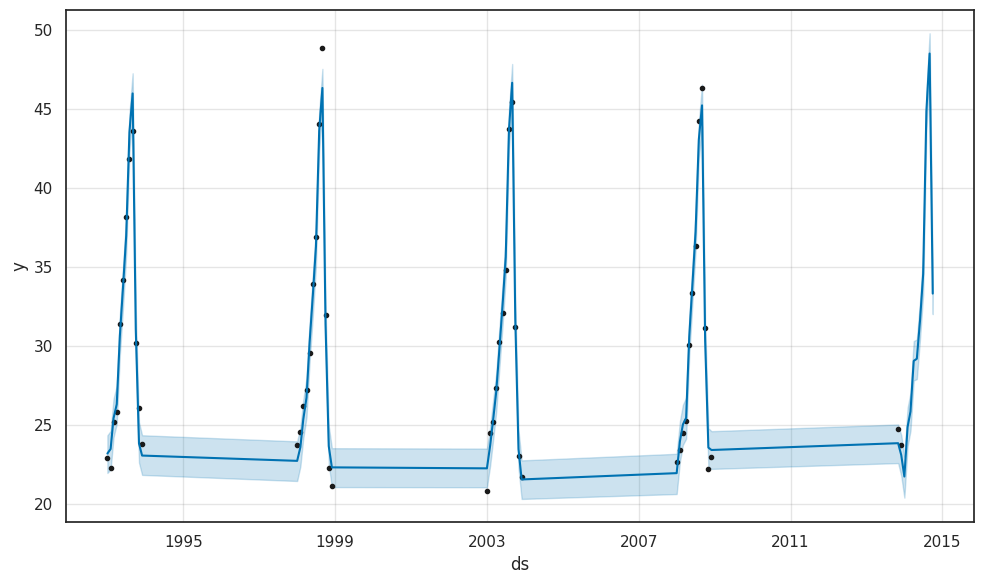

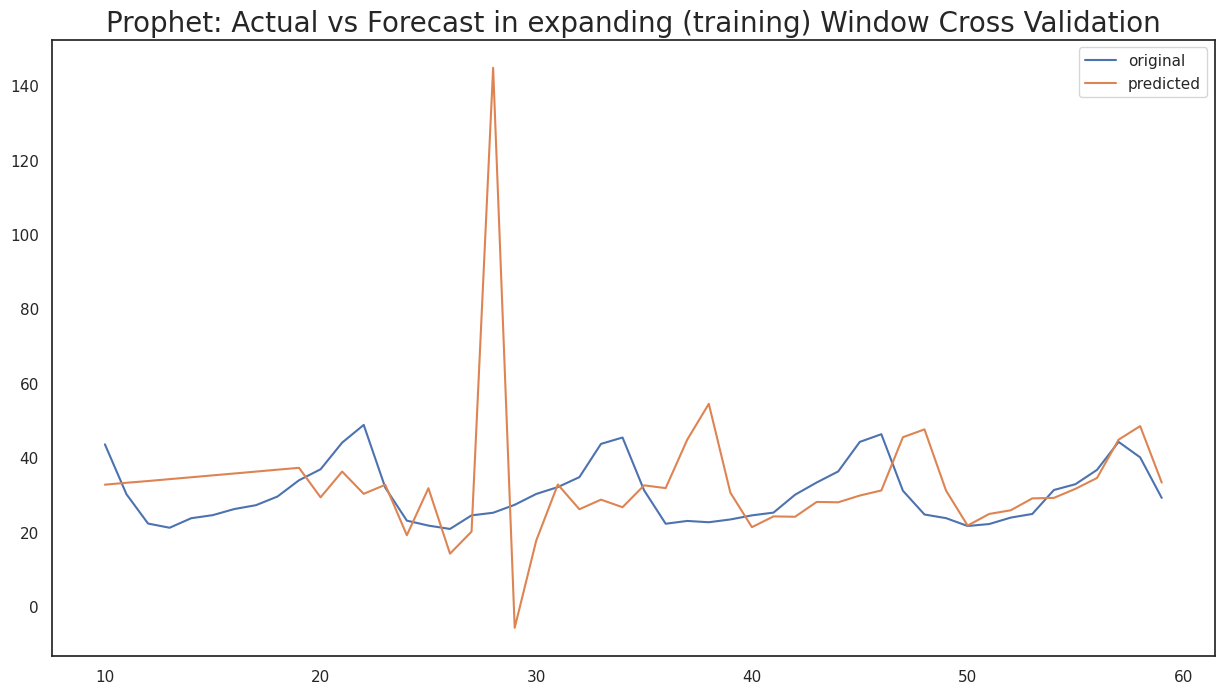

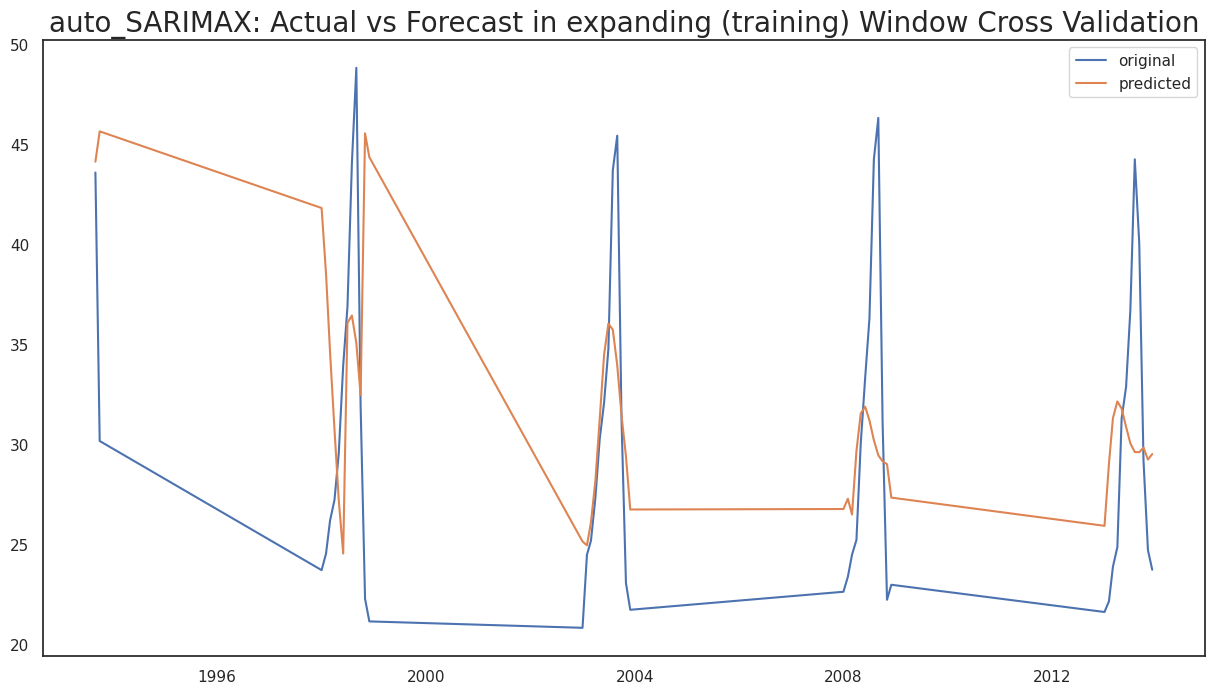

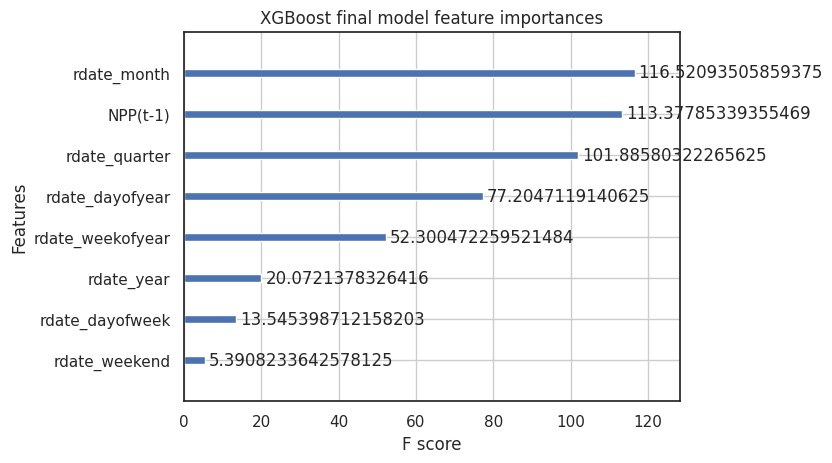

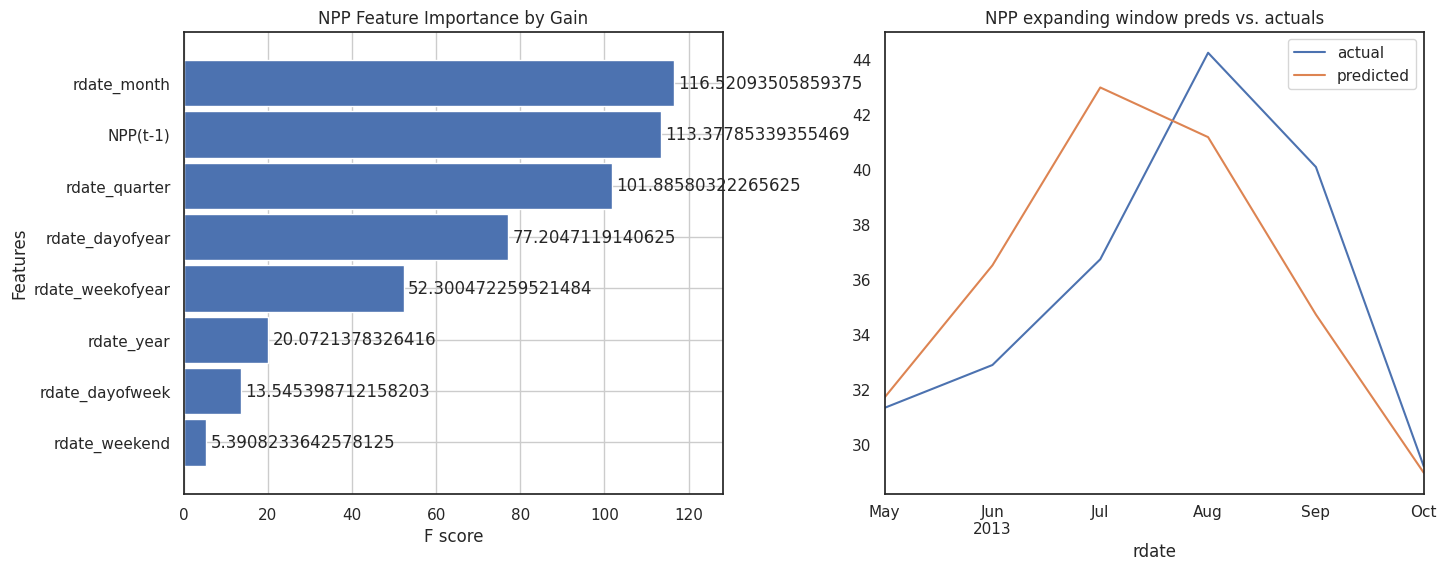

In [22]:
model.fit(traindata=train_df, ts_column='rdate', target=prediction_col)

In [ ]:
model.get_leaderboard()

,name,rmse
3,ML,3.890740
1,auto_SARIMAX,8.109517
0,Prophet,16.086282
2,VAR,inf


In [23]:
# creating forecast date samples
# Define the start and end dates
start_date = '2022-11-01'
end_date = '2032-12-01'

# Create a date range for 5 years
date_range = pd.date_range(start=start_date, end=end_date, freq='M')  # 'M' stands for daily frequency

# Create a test dataframe with the dates
forecast_data = pd.DataFrame({'rdate': date_range})

print(forecast_data)


         rdate
0   2022-11-30
1   2022-12-31
2   2023-01-31
3   2023-02-28
4   2023-03-31
..         ...
116 2032-07-31
117 2032-08-31
118 2032-09-30
119 2032-10-31
120 2032-11-30

[121 rows x 1 columns]


In [24]:
forecast=model.predict(forecast_data, model="best") # predicting the next TEN years

Predicting using test dataframe shape = (121, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for rdate. Provide strf_time format during "setup" for better results.
ML predictions completed


In [25]:
forecast

,yhat,mean_se,mean_ci_lower,mean_ci_upper
rdate,,,,
2022-11-30,28.392374,NaN,NaN,NaN
2022-12-31,28.381805,NaN,NaN,NaN
2023-01-31,31.429108,NaN,NaN,NaN
2023-02-28,31.837862,NaN,NaN,NaN
2023-03-31,32.433014,NaN,NaN,NaN
...,...,...,...,...
2032-07-31,39.028194,NaN,NaN,NaN
2032-08-31,42.064442,NaN,NaN,NaN
2032-09-30,38.758942,NaN,NaN,NaN


In [28]:
df2=df.set_index('rdate')

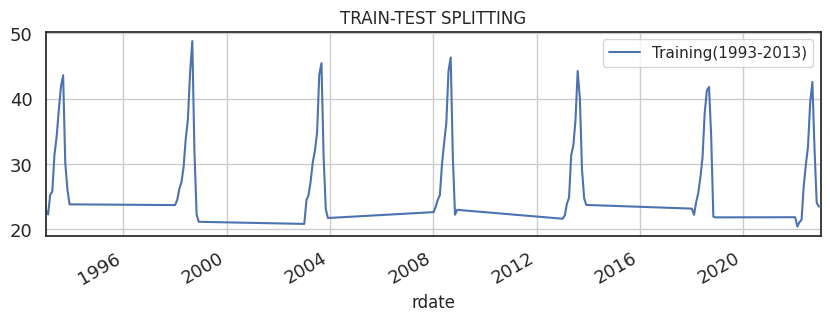

In [40]:
df2[prediction_col].plot(figsize=(10,3),fontsize=13, label='Training(1993-2013)')
# test_df[prediction_col].plot(figsize=(10,3),fontsize=13, label='Testing(2018-2022)')
plt.legend()
plt.title("TRAIN-TEST SPLITTING")
# plt.xlim(left=df2.index.min(), right=pd.to_datetime("2022-12-31"))
plt.xlim(left=pd.to_datetime("1993-01-01"), right=pd.to_datetime("2022-12-31"))


plt.grid()
plt.show()

In [26]:
fc=forecast.reset_index()

In [ ]:
tdf=test_df.reset_index(drop=True)

In [ ]:
forecast

,yhat,mean_se,mean_ci_lower,mean_ci_upper
rdate,,,,
2022-11-30,28.392374,NaN,NaN,NaN
2022-12-31,28.381805,NaN,NaN,NaN
2023-01-31,31.429108,NaN,NaN,NaN
2023-02-28,31.837862,NaN,NaN,NaN
2023-03-31,32.433014,NaN,NaN,NaN
...,...,...,...,...
2027-07-31,38.396015,NaN,NaN,NaN
2027-08-31,41.985428,NaN,NaN,NaN
2027-09-30,40.122490,NaN,NaN,NaN


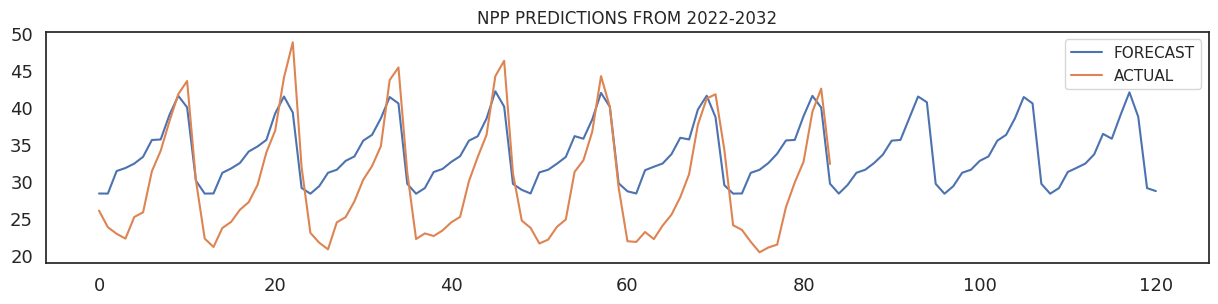

In [35]:

fc['yhat'].plot(figsize=(15,3), title='NPP PREDICTIONS FROM 2022-2032', fontsize=11, label='FORECAST')
df['NPP'].plot(figsize=(15,3),x= df['rdate'], fontsize=13, label='ACTUAL')
plt.legend()
plt.show()


In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    24 non-null     int64         
 1   DATE    24 non-null     object        
 2   month   24 non-null     object        
 3   rdate   24 non-null     datetime64[ns]
 4   NPP     24 non-null     float64       
 5   NDVI    24 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ KB


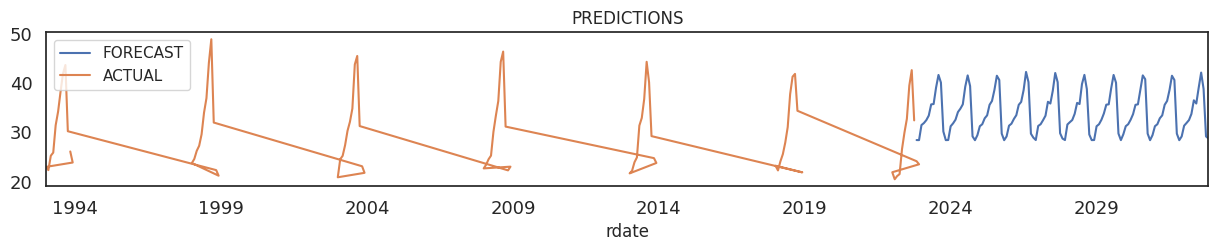

In [32]:

forecast['yhat'].plot(figsize=(15,2), title='PREDICTIONS', fontsize=13, label='FORECAST')
df2['NPP'].plot(figsize=(15,2),x= df['rdate'], title='PREDICTIONS', fontsize=13, label='ACTUAL')
plt.legend()
plt.show()


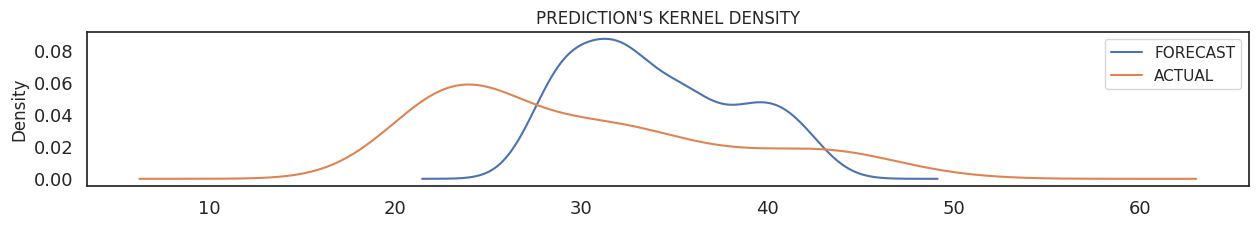

In [37]:
forecast['yhat'].plot(figsize=(15,2), title="PREDICTION'S KERNEL DENSITY", fontsize=13, label='FORECAST', kind='kde')
df2['NPP'].plot(figsize=(15,2),x= df['rdate'], fontsize=13, label='ACTUAL',kind='kde')
plt.legend()
plt.show()